In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_O_PV_check_free_slip_10_percent_the_long_one.nc") #i=103

In [4]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 1000, yF: 1, xF: 1000, yC: 1, time: 190)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 1.0 3.0 5.0 7.0 ... 1.995e+03 1.997e+03 1.999e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 2.0 4.0 6.0 ... 1.994e+03 1.996e+03 1.998e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 0 days 00:00:00 ... 33 days 19:34:41.2123...
Data variables:
    KE       (time, zC, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    Ri       (time, zF, yC, xC) float64 ...
    Ro       (time, zF, yF, xF) float64 ...
    B        (time, zC, yC, xC) float64 ...
    v        (time, zC, yF, xC) float64 ...
    w        (time, zF, yC, xC) float64 ...
    ε        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    u        (time, zC, yC, xF) float64 ...
    PV       (time, zF, yF, xF) float64 ...
Attributes:
    interval:              15707.963507194929
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 4.363 hours.
    date:                  This file was generated on 2024-04-18T23:15:28.213.
    schedule:              TimeInterval

In [5]:
u = ocean_data.u+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b + ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [ ]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[103]*(f/(2*np.pi))

In [ ]:
# ocean_data.E

In [ ]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -2
v[q].plot()
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
# plt.show()

In [ ]:
b[0,:,0,:].dims

In [ ]:
# plt.contour(b[0])
b[0,:,0,:].mean(dim='xC').plot()#.plot.contour()

In [6]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data.u.time)
def animate(t):
    plt.clf()
    ocean_data.u[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('u_base_test_case_downwelling_10_percent_u_phase.gif') 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [7]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.v[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('v_base_test_case_downwelling_10_percent_u_phase.gif') 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [8]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.PV[t].plot(add_colorbar=True,vmin=-1e-9,vmax=1e-9,cmap='seismic') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('PV_domain_entire_time_standard_case_10_percent_u_phase.gif') 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.KE[t].plot(add_colorbar=True,vmin=0,vmax=1e-7,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('u_base_test_case_downwelling_color_change.gif') 
# plt.close()

In [9]:
KE_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'KE' (time: 190)>
array([9.94006402e-09, 9.18303826e-10, 4.63674206e-10, 3.14705090e-10,
       2.34472467e-10, 1.65428980e-10, 1.27413808e-10, 1.12584137e-10,
       1.01229943e-10, 8.14848975e-11, 7.35657513e-11, 6.79102065e-11,
       6.20524980e-11, 5.27509482e-11, 4.90726160e-11, 4.90726160e-11,
       4.91280596e-11, 4.39047583e-11, 3.93474361e-11, 3.83353829e-11,
       3.77201218e-11, 3.41210490e-11, 3.13953402e-11, 3.09712202e-11,
       3.19857698e-11, 2.91806723e-11, 2.75046837e-11, 2.75784677e-11,
       2.81109787e-11, 2.66448093e-11, 2.56254641e-11, 2.64737937e-11,
       2.66870154e-11, 2.46640020e-11, 2.53933237e-11, 2.69738766e-11,
       2.81922590e-11, 2.67602290e-11, 2.84647866e-11, 3.04287426e-11,
       3.04013725e-11, 3.19897037e-11, 3.40139398e-11, 3.75415822e-11,
       3.91476469e-11, 4.17963836e-11, 4.62355384e-11, 5.11710983e-11,
       5.11710983e-11, 5.51991318e-11, 6.05702020e-11, 6.77321635e-11,
       7.61812462e-11, 8.28505630e-11, 9.30854136e-11, 1.05219171e-10,
       1.18402321e-10, 1.33659743e-10, 1.54280595e-10, 1.74712266e-10,
       1.96826885e-10, 2.25706087e-10, 2.52438608e-10, 2.52438608e-10,
       2.92512521e-10, 3.38453626e-10, 3.82139632e-10, 4.36145579e-10,
       5.04358335e-10, 5.78057732e-10, 6.71677453e-10, 7.65186252e-10,
       8.78235941e-10, 1.02174409e-09, 1.17023731e-09, 1.34376675e-09,
       1.55656449e-09, 1.79803133e-09, 2.07159178e-09, 2.38325949e-09,
...
       3.04238929e-07, 3.51083289e-07, 4.09713815e-07, 4.77339424e-07,
       5.52381382e-07, 6.38499910e-07, 7.44505835e-07, 8.69230104e-07,
       1.00201548e-06, 1.16081781e-06, 1.35655121e-06, 1.58100565e-06,
       1.82455238e-06, 2.11631517e-06, 2.47268992e-06, 2.87222539e-06,
       3.31501526e-06, 3.85247859e-06, 4.52174792e-06, 5.23873800e-06,
       6.04185768e-06, 7.03725177e-06, 8.21559437e-06, 9.52043148e-06,
       1.10126074e-05, 1.29216488e-05, 1.50706665e-05, 1.73750524e-05,
       2.01128622e-05, 2.35002533e-05, 2.74624831e-05, 3.17937891e-05,
       3.69982264e-05, 4.30190558e-05, 4.99264970e-05, 5.76461314e-05,
       6.69280820e-05, 7.87611592e-05, 9.11711297e-05, 1.04475802e-04,
       1.21156313e-04, 1.41235096e-04, 1.63839717e-04, 1.89668085e-04,
       2.20154919e-04, 2.53537672e-04, 2.93460255e-04, 3.39592034e-04,
       3.94082105e-04, 4.49585986e-04, 5.18075243e-04, 5.95218033e-04,
       7.13174542e-04, 7.85124521e-04, 7.27114001e-04, 7.86177032e-04,
       8.66319741e-04, 9.77725547e-04, 9.37974675e-04, 1.10995914e-03,
       1.14744696e-03, 1.19341906e-03, 1.21753567e-03, 1.47939660e-03,
       1.46384705e-03, 1.22427419e-03, 1.62076407e-03, 1.48650042e-03,
       1.64824680e-03, 1.51130548e-03, 1.96740500e-03, 2.08069801e-03,
       1.87122227e-03, 2.53582329e-03, 2.43395829e-03, 2.62502728e-03,
       2.73562858e-03, 2.17970893e-03])
Coordinates:
  * time     (time) timedelta64[ns] 0 days 00:00:00 ... 33 days 19:34:41.2123...

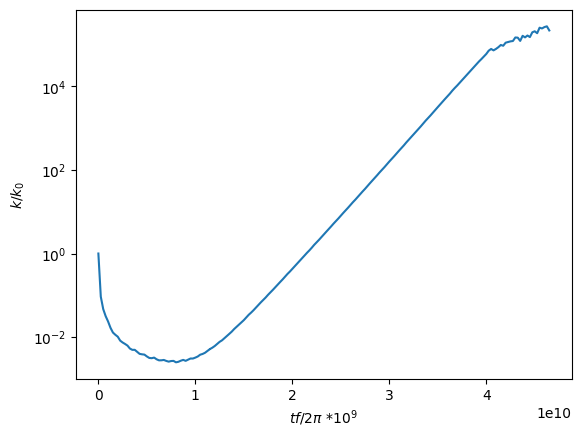

In [10]:
plt.plot(KE_spatial_average_time_series.time[0:200]*(1e-4)/(2*np.pi),KE_spatial_average_time_series.values[0:200]/KE_spatial_average_time_series.values[0])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$tf$/$2\pi$ $* 10^{9}$')
plt.yscale('log')
plt.show()

In [ ]:
KE_spatial_average_time_series.differentiate("time",datetime_unit='timedelta64[ns]')

In [ ]:
eps_spatial_average_time_series = ocean_data.ε.mean(dim=['xC','yC','zC'])

In [ ]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [ ]:
PV_spatial_average_time_series = ocean_data.PV.mean(dim=['xF','yF'])
PV_spatial_average_time_series

In [ ]:
v.zC

In [ ]:
plt.plot(u.isel(xF=500,yC=0,zC=25),v.isel(xC=500,yF=0,zC=25))
plt.gca().set_aspect('equal')

In [ ]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
u_z_average = u.mean(dim=['zC'])
v_z_average = (v+dVdz*(h-v.zC)*np.heaviside(-v.zC+110,1)-Vi).mean(dim=['zC'])
w_z_average = w.mean(dim=['zF'])
# .isel(zC=np.arange(0,55))
u_diff = (u-u_z_average).mean(dim=['xF','yC','zC'])
v_diff = (v-v_z_average+dVdz*(h-v.zC)*np.heaviside(-v.zC+110,1)-Vi).mean(dim=['xC','yF','zC'])
w_diff = (w-w_z_average).mean(dim=['xC','yC','zF'])

In [ ]:
K = 1/2 *(u_diff**2+v_diff**2+w_diff**2)

In [ ]:
plt.plot(K.time*(1e-4)/(2*np.pi),K.values/K.values[0],color="k")
# plt.plot(KE_spatial_average_time_series.time*(1e-4)/(2*np.pi),KE_spatial_average_time_series.values/K.values[0])

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    PV_spatial_average_time_series[t].plot()
    plt.ylim([0,1e-9])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('spatially_averaged_PV_standard_case_zoomed_in.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling_color_change.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].mean('xF').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_u.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].mean('xC').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_v.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    b[t].mean('xC').plot()
    plt.ylim([-0.0001,0.0001])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_b.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 20)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    cf = v[t].plot(add_colorbar=True)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()